## Project: **CarND-Advanced-Lane-Lines** 
***
In this project, .....

 [link](link)

---


## Import Packages

In [85]:
#importing packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

## Functions

In [86]:
def cal_camera (src_dir,nx,ny):

    #Arrays to store
    objpoints = [] #3D points in real world space
    imgpoints = [] #2D points in image plane
    
    # Prepare object points
    objp= np.zeros ((nx*ny,3), np.float32)
    objp[:,:2]= np.mgrid[0:nx,0:ny].T.reshape(-1,2) # x,y coordinates
    
    #set the directory for the calibration images
    imgs = glob.glob(src_dir)
        
    # look for corners from calibration images
    for idx, fname in enumerate(imgs):
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Find chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
    
    #Calibrate Camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[1::-1], None, None)
    
    #return mtx and dist for undistort
    return (mtx, dist)
    
def plot_two_imgs (img,undist_img):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(undist_img)
    ax2.set_title('Undistorted Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.savefig("output_images/calibration_example")

    

## Test Images

In [87]:
import os
#os.listdir("test_images/")
#os.listdir("camera_cal/")

## Pipeline



The pipeline ...

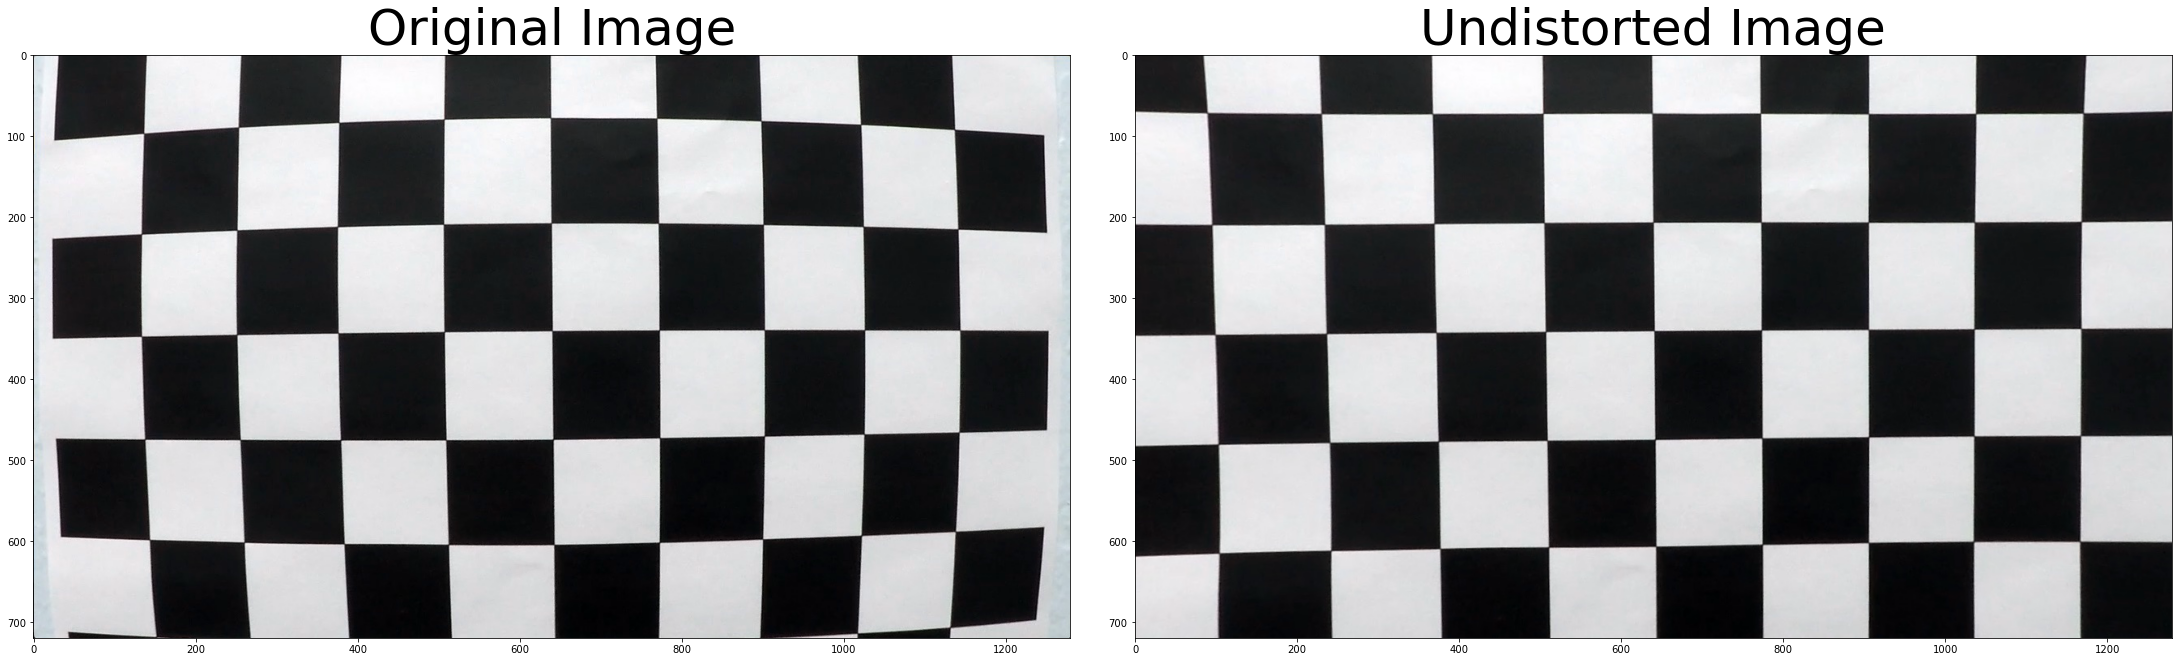

In [88]:
# TODO: Build pipeline 

#def pipeline(img):
    
#return img_output

"""
Initialize
"""

#Chessboard dimensions
nx=9
ny=6
#set directory for calibration images
directory='camera_cal/calibration*.jpg'

# Call the function calibration
mtx, dist= cal_camera(directory,nx,ny)

# Undistort image example for the project critera
img=cv2.imread('camera_cal/calibration1.jpg')
undist_img = cv2.undistort(img, mtx, dist, None, mtx)

#plot the images
plot_two_imgs (img,undist_img)

    


    

## Test on Videos

...

In [89]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [90]:
def process_image(image):
    result=pipeline(image)
    return result

# 1) Project Video

In [91]:
"""
white_output = 'test_videos_output/project_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(white_output, audio=False)
"""

'\nwhite_output = \'test_videos_output/project_video.mp4\'\nclip1 = VideoFileClip("project_video.mp4")\nwhite_clip = clip1.fl_image(process_image)\n%time white_clip.write_videofile(white_output, audio=False)\n'

In [92]:
#HTML("""
#<video width="960" height="540" controls>
#  <source src="{0}">
#</video>
#""".format(white_output))

# 2) Challenge video

In [93]:
"""
challenge_output = 'challenge_video.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)
"""

"\nchallenge_output = 'challenge_video.mp4'\nclip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')\nyellow_clip = clip2.fl_image(process_image)\n%time yellow_clip.write_videofile(yellow_output, audio=False)\n"

In [94]:
#HTML("""
#<video width="960" height="540" controls>
#  <source src="{0}">
#</video>
#""".format(yellow_output))

# 3) Harder challenge video

In [95]:
"""
harder_challenge_output = 'test_videos_output/harder_challenge_video.mp4'
clip3 = VideoFileClip('harder_challenge_video.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)
"""

"\nharder_challenge_output = 'test_videos_output/harder_challenge_video.mp4'\nclip3 = VideoFileClip('harder_challenge_video.mp4')\nchallenge_clip = clip3.fl_image(process_image)\n%time challenge_clip.write_videofile(challenge_output, audio=False)\n"

In [96]:
#HTML("""
#<video width="960" height="540" controls>
#  <source src="{0}">
#</video>
#""".format(challenge_output))